In [17]:
from ambiguous.dataset.dataset import DatasetFromNPY, DatasetTriplet
import torch
import numpy as np
import matplotlib.pyplot as plt
import torchvision
from torch.utils.data import DataLoader
SCRATCH='/network/scratch/n/nizar.islah'
emnist_root = f'{SCRATCH}/aemnistV4/'
mnist_root = f'{SCRATCH}/amnistV5/'
emccvae_path = f'{SCRATCH}/ccvae_emnistV4.pth'
mccvae_path = f'{SCRATCH}/ccvae_mnistV4.pth'

In [20]:
def load_datasets():
    emnist_trainset = DatasetTriplet(root=emnist_root, split='train', transform=None)
    mnist_trainset = DatasetTriplet(root=mnist_root, split='train', transform=None)

    emnist = DataLoader(emnist_trainset, batch_size=64, shuffle=True)
    mnist = DataLoader(mnist_trainset, batch_size=64, shuffle=True)
    return mnist, emnist

def load_ccvae():
    emnist_ccvae = ConvolutionalVAE() torch.load(emccvae_path, map_location='cpu')
    mnist_ccvae = torch.load(mccvae_path, map_location='cpu')
    return mnist_ccvae, emnist_ccvae

mnist_ccvae, emnist_ccvae = load_ccvae()

In [8]:
mnist, emnist = load_datasets()
(clean1, amb, clean2), label = next(iter(emnist))

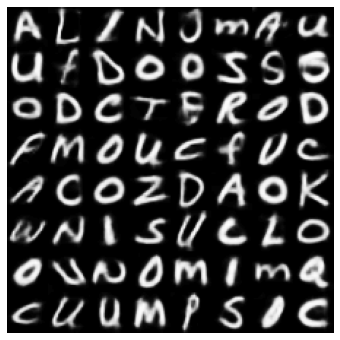

In [16]:
plt.figure(figsize=(6,6))
plt.imshow(torchvision.utils.make_grid(clean1, nrow=8, normalize=True,padding=0).permute(1, 2, 0));
plt.axis('off');